Similarity between frame 0 and frame 1: 0.9948142581839708
Similarity between frame 1 and frame 2: 0.9955602744824892
Similarity between frame 2 and frame 3: 0.999857316662372
Similarity between frame 3 and frame 4: 0.9998726780707962
Similarity between frame 4 and frame 5: 0.999807794299144
Similarity between frame 5 and frame 6: 0.9998557914246461
Similarity between frame 6 and frame 7: 0.9998524540647674
Similarity between frame 7 and frame 8: 0.9998507659480671
Similarity between frame 8 and frame 9: 0.999842613549116
Similarity between frame 9 and frame 10: 0.9998465834874184
Similarity between frame 10 and frame 11: 0.9997952809514744
Similarity between frame 11 and frame 12: 0.999827102972271
Similarity between frame 12 and frame 13: 0.9998297025798256
Similarity between frame 13 and frame 14: 0.9998234270864712
Similarity between frame 14 and frame 15: 0.9998400240325168
Similarity between frame 15 and frame 16: 0.9998114300710734
Similarity between frame 16 and frame 17: 0.999

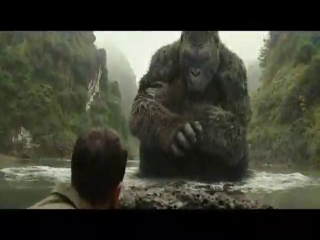

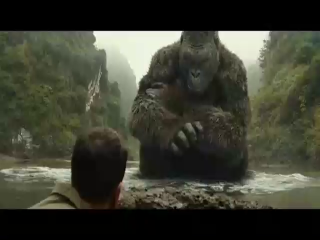

Scene cut 2: between frame 255 and frame 256 with similarity score: 0.9728856689405785


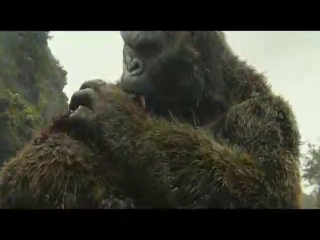

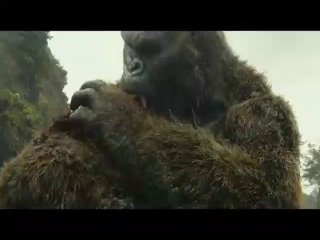

Scene cut 3: between frame 316 and frame 317 with similarity score: 0.9824628888082158


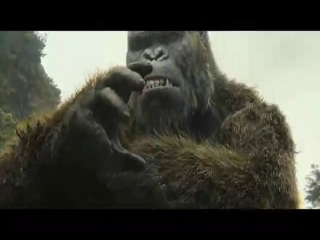

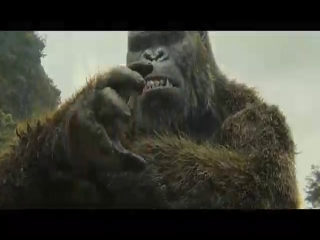

Scene cut 4: between frame 317 and frame 318 with similarity score: 0.983381368705648


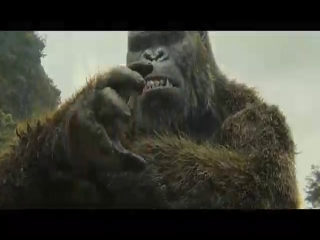

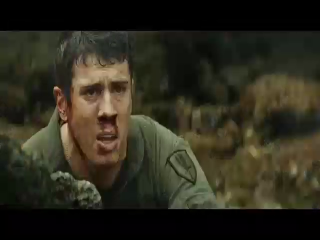

Scene cut 5: between frame 52 and frame 53 with similarity score: 0.9880909013108617


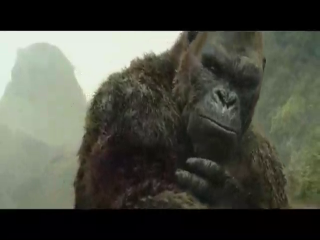

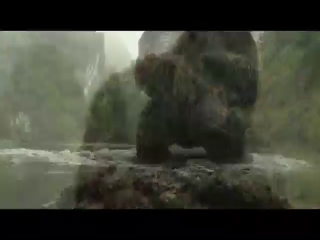

Scene cut 6: between frame 196 and frame 197 with similarity score: 0.9944830257957094


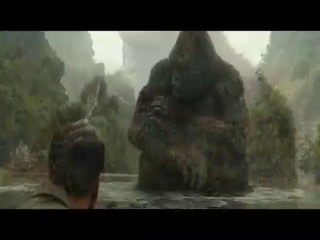

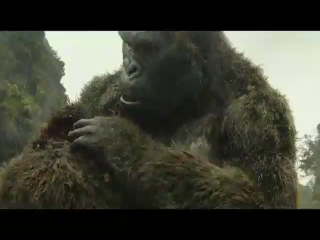

Scene cut 7: between frame 53 and frame 54 with similarity score: 0.9946741155194259


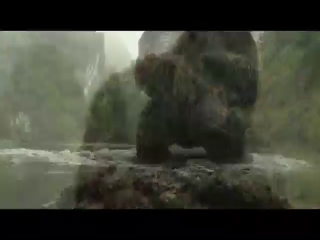

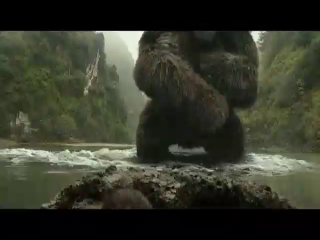

Scene cut 8: between frame 0 and frame 1 with similarity score: 0.9948142581839708


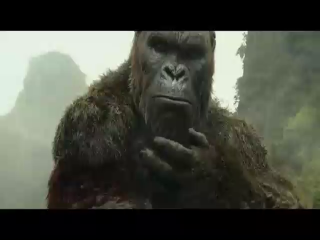

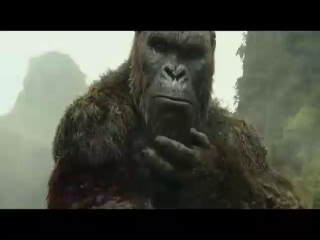

Scene cut 9: between frame 1 and frame 2 with similarity score: 0.9955602744824892


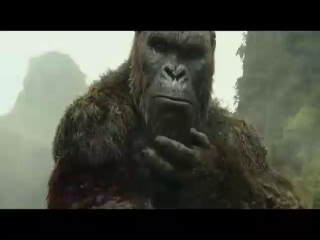

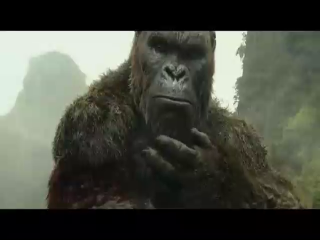

Scene cut 10: between frame 195 and frame 196 with similarity score: 0.9965107016533982


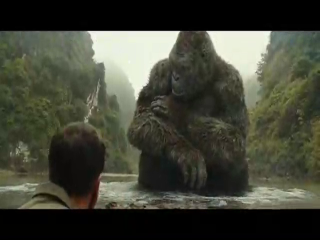

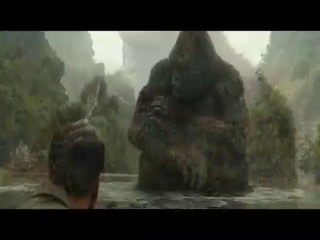

Scene cut 11: between frame 176 and frame 177 with similarity score: 0.9965574685910769


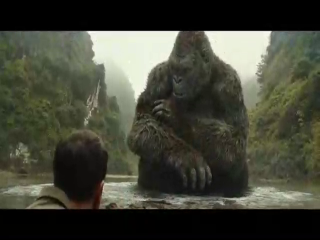

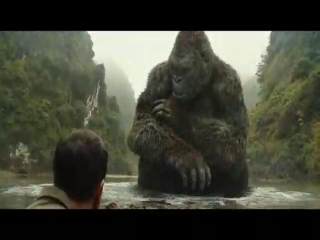

Scene cut 12: between frame 256 and frame 257 with similarity score: 0.9965965367664072


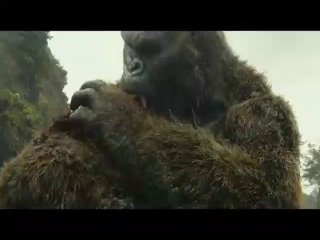

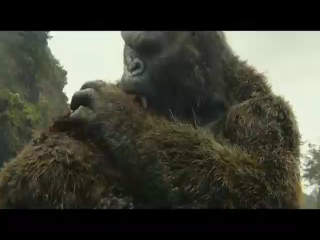

Scene cut 13: between frame 164 and frame 165 with similarity score: 0.9966469128871867


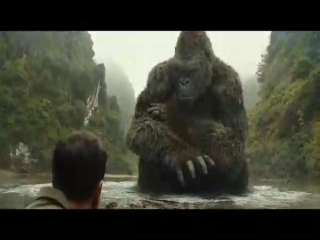

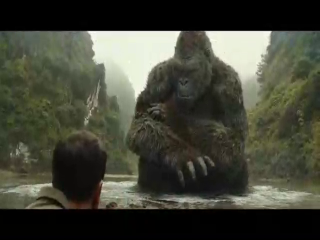

Scene cut 14: between frame 169 and frame 170 with similarity score: 0.9967374458935574


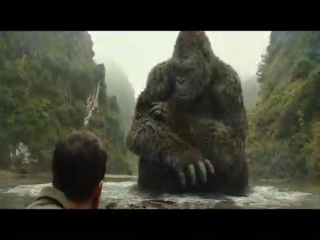

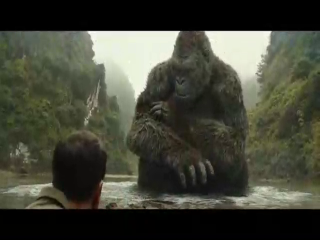

Scene cut 15: between frame 173 and frame 174 with similarity score: 0.9967441092106779


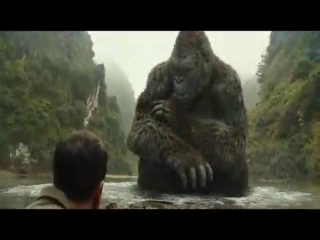

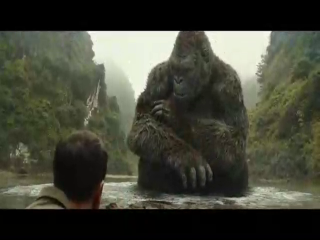

Scene cut 16: between frame 175 and frame 176 with similarity score: 0.9968040434587764


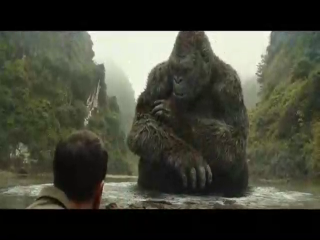

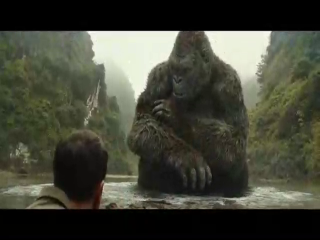

Scene cut 17: between frame 318 and frame 319 with similarity score: 0.99712186256827


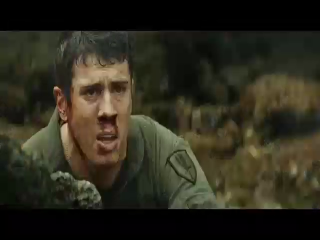

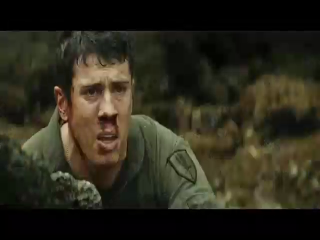

Scene cut 18: between frame 163 and frame 164 with similarity score: 0.9973850236766286


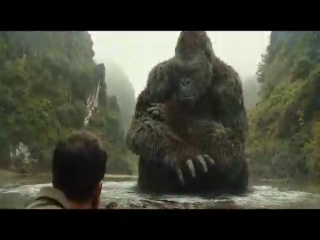

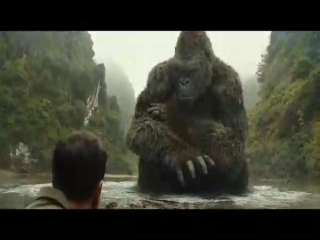

Scene cut 19: between frame 128 and frame 129 with similarity score: 0.9973965755649447


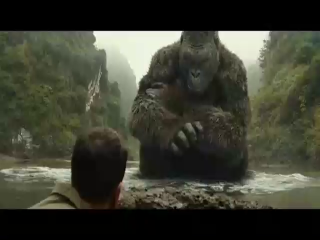

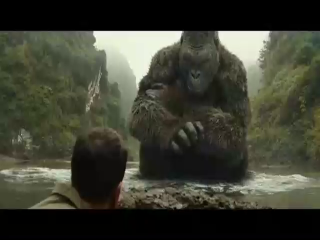

Scene cut 20: between frame 129 and frame 130 with similarity score: 0.9976341830937246


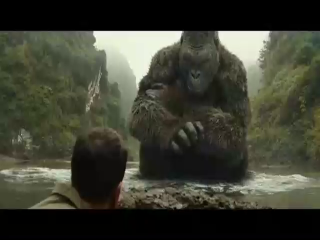

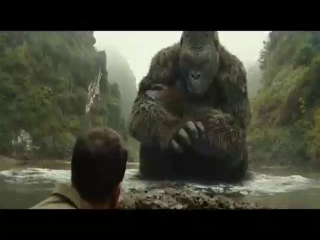

Detected soft cuts at frames: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21

In [20]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Load video and extract frames
def load_video(video_path, resize_dim=(320, 240)):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Resize frame for faster processing
        resized_frame = cv2.resize(frame, resize_dim)
        frames.append(resized_frame)

    cap.release()
    return frames

# Convert frame to HSV
def convert_to_hsv(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Noise detection using GaussianBlur
def noise_detection(frame):
    blurred = cv2.GaussianBlur(frame, (5, 5), 0)
    noise_mask = cv2.absdiff(frame, blurred)
    return noise_mask

# Histogram comparison for scene cut detection
def histogram_comparison(frame1, frame2,method=cv2.HISTCMP_CHISQR):
    hist1 = cv2.calcHist([frame1], [0, 1], None, [256, 256], [0, 256, 0, 256])
    hist2 = cv2.calcHist([frame2], [0, 1], None, [256, 256], [0, 256, 0, 256])
    cv2.normalize(hist1, hist1, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist2, hist2, 0, 1, cv2.NORM_MINMAX)

    similarity_score = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    return similarity_score

# Sobel edge detection
def sobel_edge_detection(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    edges = cv2.magnitude(sobel_x, sobel_y)
    return np.uint8(edges)

# Background subtraction for foreground vs background segmentation
def background_subtraction(frames):
    # Initialize background subtractor
    backSub = cv2.createBackgroundSubtractorMOG2()
    fg_masks = []

    for frame in frames:
        fg_mask = backSub.apply(frame)
        fg_masks.append(fg_mask)

    return fg_masks

# Soft cut detection
def soft_cut_detection(frames, threshold=30):
    soft_cut_indices = []
    for i in range(1, len(frames)):
        diff = cv2.absdiff(frames[i], frames[i-1])
        if np.sum(diff) > threshold:
            soft_cut_indices.append(i)
    return soft_cut_indices

# Find least similarity cuts (hard cuts)
def find_least_similarity_cuts(similarity_scores, frames, top_n=20):
    least_similar_indices = np.argsort(similarity_scores)[:top_n]

    print(f"Top {top_n} scene cut frames (by least similarity):")
    for i, idx in enumerate(least_similar_indices):
        print(f"Scene cut {i + 1}: between frame {idx} and frame {idx + 1} with similarity score: {similarity_scores[idx]}")
        cv2_imshow(frames[idx])
        cv2_imshow(frames[idx + 1])
        cv2.waitKey(1000)  # Wait for a key press to display next set of frames

    return least_similar_indices

# Process the video
def process_video(video_path, output_directories, top_n_cuts=20, resize_dim=(320, 240)):
    hsv_directory, noise_directory, edge_directory, fg_directory = output_directories

    # Create output directories if they don't exist
    for directory in output_directories:
        if not os.path.exists(directory):
            os.makedirs(directory)

    frames = load_video(video_path, resize_dim=resize_dim)
    hsv_frames = []
    noise_frames = []
    edge_frames = []
    similarity_scores = []

    # Background subtraction masks
    fg_masks = background_subtraction(frames)

    for idx, frame in enumerate(frames):
        # Convert each frame into HSV
        hsv_frame = convert_to_hsv(frame)
        hsv_frames.append(hsv_frame)
        cv2.imwrite(os.path.join(hsv_directory, f'hsv_frame_{idx}.png'), hsv_frame)

        # Detect noise
        noise_frame = noise_detection(frame)
        noise_frames.append(noise_frame)
        cv2.imwrite(os.path.join(noise_directory, f'noise_frame_{idx}.png'), noise_frame)

        # Perform histogram comparison with the previous frame
        if idx > 0:
            similarity = histogram_comparison(frames[idx-1], frames[idx])
            similarity_scores.append(similarity)
            print(f'Similarity between frame {idx-1} and frame {idx}: {similarity}')

        # Perform edge detection
        edge_frame = sobel_edge_detection(frame)
        edge_frames.append(edge_frame)
        cv2.imwrite(os.path.join(edge_directory, f'edge_frame_{idx}.png'), edge_frame)

        # Save foreground masks
        cv2.imwrite(os.path.join(fg_directory, f'fg_mask_{idx}.png'), fg_masks[idx])

    # Find least similarity cuts (hard cuts) and display the frames
    if len(similarity_scores) > 0:
        least_similar_indices = find_least_similarity_cuts(similarity_scores, frames, top_n_cuts)

    # Soft cut detection
    soft_cuts = soft_cut_detection(frames)
    print(f"Detected soft cuts at frames: {soft_cuts}")

# Main execution
video_path = r"/content/video.mp4"  # Update with your video path
output_directories = (
    r"/content/hsv_frames",
    r"/content/noise_frames",
    r"/content/edge_frames",
    r"/content/fg_masks"  # For foreground masks
)

process_video(video_path, output_directories, top_n_cuts=20, resize_dim=(320,240 ))
